In [1]:
#pip install pandas

In [2]:
#pip install matplotlib

In [3]:
#pip install seaborn

In [4]:
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy as sp

# 한글폰트 출력 가능 코드
#from matplotlib import rc
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
#plt.rcParams['axes.unicode_minus'] = False

In [5]:
data = pd.read_csv("../ub_dataset/경찰청 강원도경찰청_5대범죄 발생 및 검거 현황_20191231.csv")
data

,년도,발생,검거,검거율,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,2019,13859,11597,83.7,22,21,25,26,689,650,4675,3155,8448,7745
1,2018,14094,11980,85.0,25,24,16,16,699,665,4300,3048,9054,8227
2,2017,16187,13540,83.6,32,32,27,26,627,591,5248,3628,10253,9263
3,2016,16678,14037,84.2,28,29,28,29,603,570,5166,3568,10853,9841
4,2015,16441,13020,79.2,33,31,35,35,577,544,5966,3740,9830,8670
5,2014,16487,12004,72.8,25,24,56,55,582,560,6203,2988,9621,8377


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도      6 non-null      int64  
 1   발생      6 non-null      int64  
 2   검거      6 non-null      int64  
 3   검거율     6 non-null      float64
 4   살인 발생   6 non-null      int64  
 5   살인 검거   6 non-null      int64  
 6   강도 발생   6 non-null      int64  
 7   강도 검거   6 non-null      int64  
 8   강간 발생   6 non-null      int64  
 9   강간 검거   6 non-null      int64  
 10  절도 발생   6 non-null      int64  
 11  절도 검거   6 non-null      int64  
 12  폭력 발생   6 non-null      int64  
 13  폭력 검거   6 non-null      int64  
dtypes: float64(1), int64(13)
memory usage: 800.0 bytes


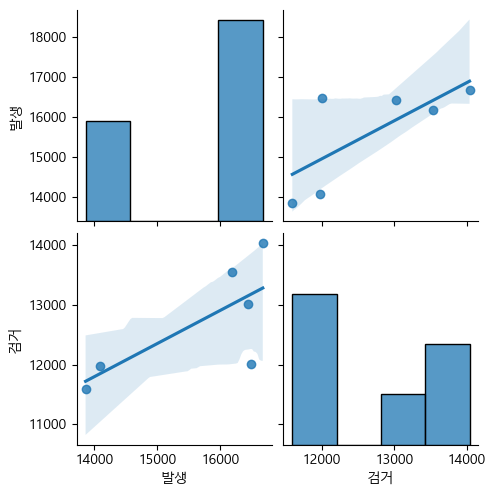

In [7]:
# 상관분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.
sub = data[['발생', '검거']] #[{'발생', '검거'}]

# 각 데이터의 히스토그램과 산점도를 도출(산점도에는 회귀선까지 구현)
sns.pairplot(sub, kind='reg')
plt.show()

In [8]:
data['발생'].sum() #np.sum(data['발생'])

93746

In [9]:
data['발생'].mean() #np.sum(data['발생'])/len(data['발생'])

15624.333333333334

In [10]:
# 평균
mu_1 = data['발생'].mean()
mu_2 = data['검거'].mean()

In [11]:
np.sum([pow(i - mu_1, 2) for i in data['발생']])

8296267.333333333

In [21]:
def sumv(x):
    result = pow(x-mu_1,2)
    return result

data['발생'].apply(sumv).sum()

8296267.333333333

In [13]:
np.sum([pow(i - mu_1, 2) for i in data['발생']])

8296267.333333333

In [22]:
#분산(잔차의 제곱 합의 평균), 표준편차(분산의 제곱근)
var_1 = np.sum([pow(i - mu_1, 2) for i in data['발생']]) / (len(data['발생']))
var_2 = np.sum([pow(i - mu_2, 2) for i in data['검거']]) / (len(data['검거']))
std_1 = var_1 ** 0.5
std_2 = var_2 ** 0.5

In [24]:
data['발생'] - mu_1

0   -1765.333333
1   -1530.333333
2     562.666667
3    1053.666667
4     816.666667
5     862.666667
Name: 발생, dtype: float64

In [25]:
# 공분산
covariance_ddof = sum( (data['발생'] - mu_1) * (data['검거'] - mu_2) ) / (len(data['발생']) -1)
correlation_ddof = covariance_ddof / (std_1 * std_2) # 공분산 / (표준편차1 * 표준편차2)

분모 발행 길이로 했는데 어차피 발행 길이나 검거 길이가 같기 때문에..